### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\bergermann\.julia\registries\General.toml`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`
    Updating `C:\Users\bergermann\.julia\environments\v1.11\Project.toml`
  [2528b1d8] ~ Dragoon v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main`
    Updating `C:\Users\bergermann\.julia\environments\v1.11\Manifest.toml`
  [2528b1d8] ~ Dragoon v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main`
Precompiling project...
   7457.5 ms  ✓ Dragoon
  1 dependency successfully precompiled in 15 seconds. 267 already precompiled.


In [2]:
using Dragoon
using Plots

In [13]:
n = 20 # number of discs in the booster

initdist = findpeak1d(22.025e9,n) # initial disc configuration

freqs = genFreqs(22.025e9,50e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster
booster.wavelength = λ(22.025e9)

hist = initHist(booster,10000,freqs,ObjAnalytical);

### Optimizer

In [14]:
trace = adam(booster,hist,freqs,
        1e-6,0.9,0.999,1e-3,
        ObjAnalytical,
        Derivator1(1e-6,"double"),
        UnstuckDont;
        ϵgrad=0.0,
        maxiter=Int(1e4),
        showtrace=true,
        showevery=Int(1e3),
        resettimer=true,
        returntimes=false);

In [15]:
trace[end].obj

-14609.535028006398

In [16]:
# obtain result, booster is now in optimized position
pos2dist(booster.pos)     #in distance space
# booster.pos               #in position space

20-element Vector{Float64}:
 0.007005045557826316
 0.007224746178547586
 0.00722508554691204
 0.007224750534281455
 0.007224723139757979
 0.007224817355249811
 0.007224828335690264
 0.007224856963972717
 0.007224936417101231
 0.007224969506492236
 0.0072250351786088
 0.00722498539675727
 0.007224840266014305
 0.006896817833681152
 0.007931032874873123
 0.0071999093051470795
 0.007204405286066974
 0.006933346238401029
 0.007253926652010302
 0.006894153530487252

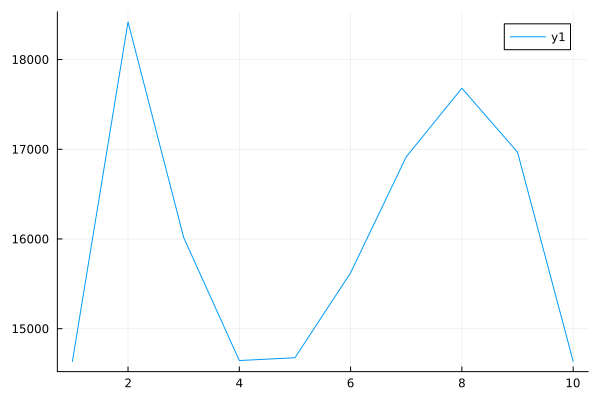

In [18]:
plot(getBoost1d(booster,freqs))

In [19]:
booster.timestamp


0000-01-01T01:42:08.976

In [17]:
# get handy output
plt = analyse(booster,hist,trace,freqsplot; freqs=freqs,div=10,ylim=[0,100e3])

# savefig(plt[i],"cool_epic_result_wow.svg")

MethodError: MethodError: no method matching analyse(::AnalyticalBooster, ::Vector{State}, ::Vector{Dragoon.ATrace}, ::Vector{Float64}; freqs::Vector{Float64}, div::Int64, ylim::Vector{Float64})
The function `analyse` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  analyse(::Any, ::Any, !Matched::Vector{Dragoon.NMTrace}, ::Any; freqs, plotting, div, ylim)
   @ Dragoon C:\Users\bergermann\.julia\packages\Dragoon\12GHO\src\neldermead\functions.jl:50
  analyse(::Any, !Matched::Vector{Dragoon.ATrace}, ::Any; freqs, plotting, div, ylim)
   @ Dragoon C:\Users\bergermann\.julia\packages\Dragoon\12GHO\src\adam\functions.jl:61
  analyse(::Any, !Matched::Vector{Dragoon.SATrace}, ::Any; freqs, plotting, div, ylim)
   @ Dragoon C:\Users\bergermann\.julia\packages\Dragoon\12GHO\src\annealing\functions.jl:75
  ...


In [ ]:
booster.timestamp

In [ ]:
analyse()